Read Data from .csv files . I choosed the Ratio 60 to 40 for train data to test data ; 

In [122]:
import numpy as np
import pandas as pa
import re as re
import matplotlib.pyplot as plt
## make test and train files ; 
n = 40000
T = 100_000
total_Data = pa.read_csv("Airplane.csv")

# with open("Airplane.csv") as f, open("Airplane_Test.csv", "w") as test , open("Airplane_Train.csv", "w") as train:
#     for x in range(n+1):
#         test.write(next(f))
#     for x in range(n+1 ,T ) :
#         train.write(next(f)) 
    

In [123]:
test = pa.read_csv("Airplane_Test.csv")
train = pa.read_csv("Airplane_Train.csv")
test = test.drop("Unnamed: 0",axis=1)
train = train.drop("Unnamed: 0",axis=1)
model_info = [train , test ]
Restuarnt_Data = pa.read_csv("Resturant.csv")
for data in model_info : 
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0 ,'satisfied' :1} )
    data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0)

Find most and least impactable features for the Goal column ; 

1. Gender

In [124]:
print(train[['Gender' , 'satisfaction']].groupby(['Gender'] , as_index=False ).mean() )

   Gender  satisfaction
0  Female      0.423789
1    Male      0.438771


2. Type of Travel

In [125]:
print(train[['satisfaction' , 'Type of Travel' ]].groupby(['Type of Travel'] , as_index=False ).mean() )

    Type of Travel  satisfaction
0  Business travel      0.579661
1  Personal Travel      0.101069


3. Age

In [126]:
# shoud make subset of ages; 
print(train[['Age' , 'satisfaction']].groupby(['Age'] , as_index=False ).mean() )

    Age  satisfaction
0     7      0.115502
1     8      0.094595
2     9      0.140777
3    10      0.108808
4    11      0.146465
..  ...           ...
70   77      0.096154
71   78      0.300000
72   79      0.280000
73   80      0.261905
74   85      0.222222

[75 rows x 2 columns]


Plot Age Data

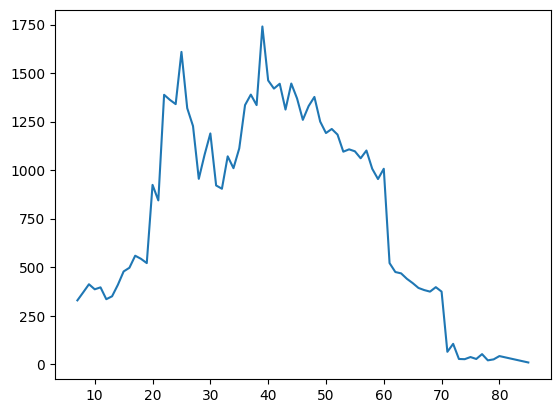

In [127]:
# train_plt = plt.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)
unique_values,count = np.unique(train["Age"], return_counts=True)
plt.plot(unique_values,count)
plt.show() 

4. Class

In [128]:
print(train[['Class' , 'satisfaction']].groupby(['Class'] , as_index=False ).mean() )

      Class  satisfaction
0  Business      0.692894
1       Eco      0.183655
2  Eco Plus      0.238118


5. Customer Type 

In [129]:
print(train[['Customer Type' , 'satisfaction']].groupby(['Customer Type'] , as_index=False ).mean() )

       Customer Type  satisfaction
0     Loyal Customer      0.475896
1  disloyal Customer      0.231743


6. Flight Distance

In [130]:
# should have sub range 
print(train[['Flight Distance' , 'satisfaction']].groupby(['Flight Distance'] , as_index=False ).mean() )

      Flight Distance  satisfaction
0                  31      0.200000
1                  56      0.400000
2                  67      0.342105
3                  73      0.314286
4                  74      0.352941
...               ...           ...
3699             4243      0.555556
3700             4502      0.400000
3701             4817      0.333333
3702             4963      0.333333
3703             4983      0.750000

[3704 rows x 2 columns]


Plot Flight Distance 

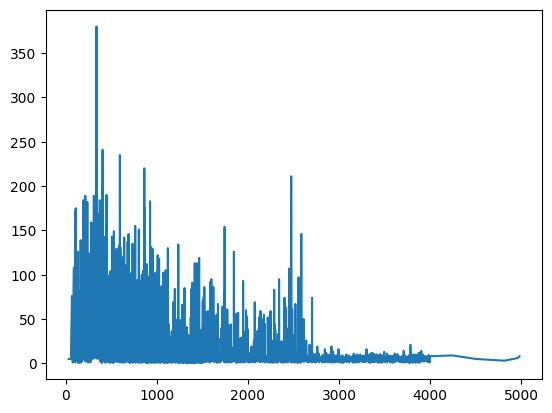

In [131]:
unique_values,count = np.unique(train["Flight Distance"], return_counts=True)
plt.plot(unique_values,count)
plt.show() 

7. Inflight wifi service

In [132]:
print(train[['Inflight wifi service' , 'satisfaction']].groupby(['Inflight wifi service'] , as_index=False ).mean() )

   Inflight wifi service  satisfaction
0                      0      0.996646
1                      1      0.323432
2                      2      0.251306
3                      3      0.248191
4                      4      0.597947
5                      5      0.989721


8. Departure/Arrival time convenient

In [133]:
print(train[['Departure/Arrival time convenient' , 'satisfaction']].groupby(['Departure/Arrival time convenient'] , as_index=False ).mean() )

   Departure/Arrival time convenient  satisfaction
0                                  0      0.473217
1                                  1      0.483972
2                                  2      0.442452
3                                  3      0.434180
4                                  4      0.388061
5                                  5      0.423002


9. Ease of Online booking

In [134]:
print(train[['Ease of Online booking' , 'satisfaction']].groupby(['Ease of Online booking'] , as_index=False ).mean() )

   Ease of Online booking  satisfaction
0                       0      0.656915
1                       1      0.375062
2                       2      0.302460
3                       3      0.307089
4                       4      0.530214
5                       5      0.734990


10. Gate location

In [135]:
print(train[['Gate location' , 'satisfaction']].groupby(['Gate location'] , as_index=False ).mean() )

   Gate location  satisfaction
0              0      1.000000
1              1      0.495873
2              2      0.457657
3              3      0.344962
4              4      0.390784
5              5      0.564890


11. Food and drink

In [136]:
print(train[['Food and drink' , 'satisfaction']].groupby(['Food and drink'] , as_index=False ).mean() )

   Food and drink  satisfaction
0               0      0.400000
1               1      0.201968
2               2      0.383236
3               3      0.394988
4               4      0.523820
5               5      0.544398


12. Online boarding

In [137]:
print(train[['Online boarding' , 'satisfaction']].groupby(['Online boarding'] , as_index=False ).mean() )

   Online boarding  satisfaction
0                0      0.552966
1                1      0.130713
2                2      0.115629
3                3      0.136677
4                4      0.621782
5                5      0.868595


13. Seat comfort

In [138]:
print(train[['Seat comfort' , 'satisfaction']].groupby(['Seat comfort'] , as_index=False ).mean() )

   Seat comfort  satisfaction
0             1      0.227306
1             2      0.217669
2             3      0.206202
3             4      0.561827
4             5      0.647047


14. Inflight entertainment

In [139]:
print(train[['Inflight entertainment' , 'satisfaction']].groupby(['Inflight entertainment'] , as_index=False ).mean() )

   Inflight entertainment  satisfaction
0                       0      0.000000
1                       1      0.141486
2                       2      0.208875
3                       3      0.263801
4                       4      0.611299
5                       5      0.647761


15. On-board service

In [140]:
print(train[['On-board service' , 'satisfaction']].groupby(['On-board service'] , as_index=False ).mean() )

   On-board service  satisfaction
0                 0      0.000000
1                 1      0.195345
2                 2      0.252441
3                 3      0.310235
4                 4      0.532764
5                 5      0.644688


16. Leg room service

In [141]:
print(train[['Leg room service' , 'satisfaction']].groupby(['Leg room service'] , as_index=False ).mean() )

   Leg room service  satisfaction
0                 0      0.317073
1                 1      0.200268
2                 2      0.276025
3                 3      0.266979
4                 4      0.578632
5                 5      0.612468


17. Baggage handling

In [142]:
print(train[['Baggage handling' , 'satisfaction']].groupby(['Baggage handling'] , as_index=False ).mean() )

   Baggage handling  satisfaction
0                 1      0.297214
1                 2      0.296409
2                 3      0.231905
3                 4      0.478905
4                 5      0.610350


18. Checkin service

In [143]:
print(train[['Checkin service' , 'satisfaction']].groupby(['Checkin service'] , as_index=False ).mean() )

   Checkin service  satisfaction
0                1      0.237150
1                2      0.244521
2                3      0.443275
3                4      0.463672
4                5      0.610683


19. Inflight service

In [144]:
print(train[['Inflight service' , 'satisfaction']].groupby(['Inflight service'] , as_index=False ).mean() )

   Inflight service  satisfaction
0                 0      0.000000
1                 1      0.289002
2                 2      0.303520
3                 3      0.232217
4                 4      0.475424
5                 5      0.610614


20. Cleanliness

In [145]:
print(train[['Cleanliness' , 'satisfaction']].groupby(['Cleanliness'] , as_index=False ).mean() )

   Cleanliness  satisfaction
0            0      0.000000
1            1      0.195652
2            2      0.207320
3            3      0.431140
4            4      0.533120
5            5      0.606125


21. Departure Delay in Minutes

In [146]:
print(train[['Departure Delay in Minutes' , 'satisfaction']].groupby(['Departure Delay in Minutes'] , as_index=False ).mean() )

     Departure Delay in Minutes  satisfaction
0                             0      0.454101
1                             1      0.454759
2                             2      0.458495
3                             3      0.432849
4                             4      0.428571
..                          ...           ...
391                         930      0.000000
392                         933      1.000000
393                         978      0.000000
394                        1017      1.000000
395                        1592      0.000000

[396 rows x 2 columns]


Plot  Departure delay in miunts 

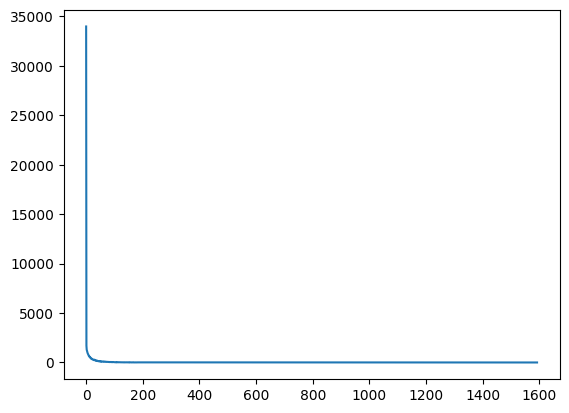

In [147]:
unique_values,count = np.unique(train["Departure Delay in Minutes"], return_counts=True)
plt.plot(unique_values,count)
plt.show() 

22. Arrival Delay in Minutes

In [148]:
print(train[['Arrival Delay in Minutes' , 'satisfaction']].groupby(['Arrival Delay in Minutes'] , as_index=False ).mean() )


     Arrival Delay in Minutes  satisfaction
0                         0.0      0.470016
1                         1.0      0.456505
2                         2.0      0.469317
3                         3.0      0.492793
4                         4.0      0.484489
..                        ...           ...
404                     924.0      0.000000
405                     952.0      0.000000
406                     970.0      0.000000
407                    1011.0      1.000000
408                    1584.0      0.000000

[409 rows x 2 columns]


Plot Arrival Delay in Minutes

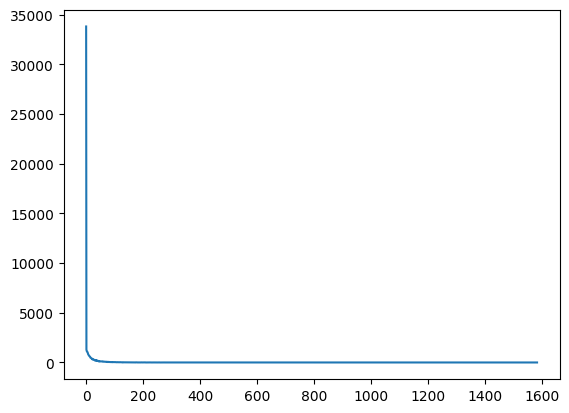

In [149]:
unique_values,count = np.unique(train["Arrival Delay in Minutes"], return_counts=True)
plt.plot(unique_values,count)
plt.show() 

Drop less important columns and insert a new column 
in previous blocks which represent 2 plots for "Arrival Delay in Minutes" and "Departure Delay in Minutes" I realized that these 2 diagrams are same approxiamately so I made a new column named "Arrival/Departure Delay in Minutes" which is the average of previous columns ; 
I also delete "id" and "Departure/Arrival time convenient" columns becase of their tiny affect on final result ; 

In [150]:

train = train.drop( "id", axis='columns' )
test = test.drop( "id", axis='columns' )  
train = train.drop( "Departure/Arrival time convenient", axis='columns' )
test = test.drop( "Departure/Arrival time convenient", axis='columns' ) 
train = train.drop( "Gender", axis='columns' )
test = test.drop( "Gender", axis='columns' ) 


c0 =  train['Departure Delay in Minutes']
# print("max and min in age")
c1 = train['Arrival Delay in Minutes'] 
arrival_departure_delay = []
for i in range(len(c0)) : 
    arrival_departure_delay.append( (int)((c0[i]+c1[i])/2) )
train.insert(21 , 'Arrival/Departure Delay in Minutes' , arrival_departure_delay)

c0 =  test['Departure Delay in Minutes']
# print("max and min in age")
c1 = test['Arrival Delay in Minutes'] 
arrival_departure_delay = []
for i in range(len(c0)) : 
    arrival_departure_delay.append( (int)((c0[i]+c1[i])/2) )
    
test.insert(21 , 'Arrival/Departure Delay in Minutes' , arrival_departure_delay)

train = train.drop( "Departure Delay in Minutes", axis='columns' )
test = test.drop( "Departure Delay in Minutes", axis='columns' )

train = train.drop( "Arrival Delay in Minutes", axis='columns' ) 
test = test.drop( "Arrival Delay in Minutes", axis='columns' ) 


Check new added column

In [151]:
print(train[['Arrival/Departure Delay in Minutes' , 'satisfaction']].groupby(['Arrival/Departure Delay in Minutes'] , as_index=False ).mean() )

     Arrival/Departure Delay in Minutes  satisfaction
0                                     0      0.466721
1                                     1      0.479196
2                                     2      0.477234
3                                     3      0.417364
4                                     4      0.408113
..                                  ...           ...
396                                 926      1.000000
397                                 941      0.000000
398                                 974      0.000000
399                                1014      1.000000
400                                1588      0.000000

[401 rows x 2 columns]


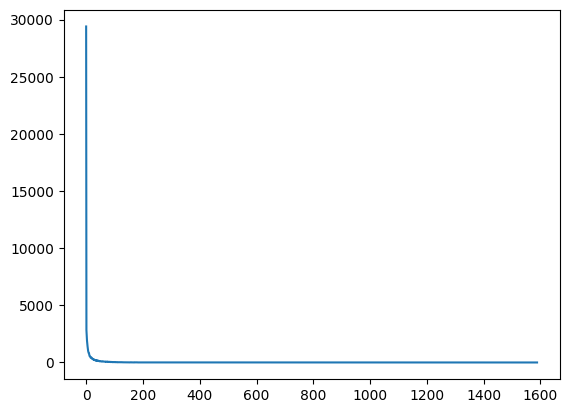

In [152]:
unique_values,count = np.unique(train["Arrival/Departure Delay in Minutes"], return_counts=True)
plt.plot(unique_values,count)
plt.show() 

Classify Columns into numaric values ; 

In [153]:
model_info = [train , test ]
for data in model_info : 
    # #map goal column to 1 or 0 
    # data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0 ,'satisfied' :1} )

    # classify customer type
    data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 1 ,'disloyal Customer' :0 } )

    # classify type of travel 
    data['Type of Travel'] = data['Type of Travel'].map({'Business travel' : 0 ,'Personal Travel' :1 } )
    # classify Class 
    data['Class'] = data['Class'].map({'Business' : 0 ,'Eco' :1 ,'Eco Plus' :2 } )

    #classify Gender 
    # data['Gender'] = data['Gender'].map({'Male' : 0 ,'Female' :1 } )

    # classify age 
    data.loc[data['Age'] <= 16  , 'Age']                          = 0 
    data.loc[ (data['Age'] > 16 ) & (data['Age'] <= 32 ) , 'Age'] = 1 
    data.loc[ (data['Age'] > 32 ) & (data['Age'] <= 48 ) , 'Age'] = 2 
    data.loc[ (data['Age'] > 48 ) & (data['Age'] <= 64 ) , 'Age'] = 3
    data.loc[ (data['Age'] > 64 ) & (data['Age'] <= 80 ) , 'Age'] = 4
    data.loc[ (data['Age'] > 80 ) , 'Age']                        = 5
    
    # classify Arrival/Departure Delay in Minutes
    data.loc[  data['Arrival/Departure Delay in Minutes'] == 0.0  ,      'Arrival/Departure Delay in Minutes']                                                      = 0 
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 0.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 10.0 ) , 'Arrival/Departure Delay in Minutes']   = 5 
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 10.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 20.0 ) ,  'Arrival/Departure Delay in Minutes']   = 2
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 20.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 30.0 ) ,  'Arrival/Departure Delay in Minutes']   = 3
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 30.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 50.0 ) ,  'Arrival/Departure Delay in Minutes']   = 3
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 50.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 80.0 ) ,  'Arrival/Departure Delay in Minutes']   = 4 
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 80.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 120.0 ) , 'Arrival/Departure Delay in Minutes']   = 5 
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 120.0 ) &(data['Arrival/Departure Delay in Minutes'] <= 170.0 ) , 'Arrival/Departure Delay in Minutes']   = 6
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 170.0 ) &(data['Arrival/Departure Delay in Minutes'] <= 200.0 ) , 'Arrival/Departure Delay in Minutes']   = 7
    data.loc[ (data['Arrival/Departure Delay in Minutes'] > 200.0 ) , 'Arrival/Departure Delay in Minutes']                                                           = 8
   
    # classify Flight Distance

    data.loc[ (data['Flight Distance'] <= 1000 ) ,  'Flight Distance']                                      = 0
    data.loc[ (data['Flight Distance'] > 1000 ) & (data['Flight Distance'] <= 2000 ) ,  'Flight Distance']  = 1
    data.loc[ (data['Flight Distance'] > 2000 ) &  (data['Flight Distance'] <= 3000 ) , 'Flight Distance']  = 2
    data.loc[ (data['Flight Distance'] > 3000 ) & (data['Flight Distance'] <= 4000 ) , 'Flight Distance']   = 3
    data.loc[ (data['Flight Distance'] > 4000 ) , 'Flight Distance']                                        = 4
    


start making the tree 
0. make essential classes => node & tree
1. make "DecisionTree" func
2. make "Importance" func
3. make "GniniIndex" func
4. make "Entropy" func 

1. Node 
these class represent the 


In [154]:
class Node(object) : 
    def __init__(self,attribute=None ,classification=None , data=None):
        self.Attribute = attribute
        self.Classification = classification
        self.Data = data 
        self.Children = {}

    def AddChild(self ,child , label ) : 
        a = self.Attribute
        self.Children[label] = child 
        



points to attention : 
work with numpy array !!!!!
what was plurality_value ? 
find a better way to get different labels of an Attribute 

In [155]:
import math

class Decision_Tree(object) : 
    Root = Node(None , None , None )
    def __init__(self , goal=None ,attributes=None,importance_method=None,data=None) :  ##, test_data=None , train_data=None , root=None 
        self.Goal = goal
        self.Importance_Method = importance_method 
        self.Attributes = attributes
        self.Data = data
        self.Depth = 0
        self.Min_Sample_Data =0
        
    def Plurality_Value(self,data,m=None) : 
        unique_values,count = np.unique( data[self.Goal] , return_counts=True )
        plurality = 0.00
        value = 0
        for u,c in zip(unique_values , count ) : 
            if( c > plurality ) :
                plurality = c 
                value = u 
        node = Node(None , value , None )
        return node 
    
    def Get_Attribute_Lables(self , attribute,data): 
        unique_values,count = np.unique(data[attribute], return_counts=True)     
        return (unique_values,count)

    def Get_Classification(self , data, Goal ) : 
        unique_values = self.Get_Attribute_Lables(Goal , data )[0]
        if ( len(unique_values ) >= 2 ) : 
            return -1 
        else : 
            return unique_values[0]


    def Get_Labeled_Data( self , label , data, main_attribute ) : 
        labeled_data = data[ data[main_attribute] == label ]
        return labeled_data

    def Get_Entropy(self , data,Goal) : 
        (unique_values,counts) = self.Get_Attribute_Lables(Goal , data )
        B = []
        total = np.sum(counts)
        for c in counts : 
            p = (float)(c/total)
            log = math.log2(p)
            B.append( (float)(p*log) )
        return -np.sum(B)


    def Importance_Entropy(self, attributes , data ) : 
        Gains = []
        Total = len(data)
        entropyA = self.Get_Entropy(data , self.Goal )
        for attribute in attributes : 
            Entropies = [] #np.array(size = len(attributes))
            lables = self.Get_Attribute_Lables(attribute , data )[0]
            # datas = np.array()
            for l in lables : 
                exs = self.Get_Labeled_Data(l , data , attribute )
                # display(exs)
                entropy = self.Get_Entropy(exs , self.Goal)
                coefficient= (float)(len(exs)/Total)
                Entropies.append( (float)(coefficient*entropy) )
            reminderA = np.sum(Entropies)       
            Gains.append(( (entropyA-reminderA)  , attribute ) )
        return max(Gains)[1]  #******************************

    def Get_GiniIndex(self, data,Goal) : 
        (unique_values,counts) = self.Get_Attribute_Lables(Goal , data )
        B = []
        total = np.sum(counts)
        for c in counts : 
            p = (float)(c/total)
            pow = (float)(math.pow(p,2)) 
            B.append( pow )
        return ( 1- (float)(np.sum(B)) )

    def Importance_GiniIndex(self, attributes , data ): 
        # TotalGini = Get_GiniIndex(data)
        Total = len(data)
        AveragedGini = []
        for attribute in attributes : 
            GiniImpurities = []  #np.array(size = len(attributes))
            lables = self.Get_Attribute_Lables(attribute , self.Data )[0]
            
            for l in lables : 
                exs = self.Get_Labeled_Data(l , data , attribute )
                
                Gini = self.Get_GiniIndex(exs , self.Goal)  # 1 - sum ((p2)^2+ (p1)^2+ ...+ (pi)2 ) 
                coefficient= (float)(len(exs)/Total)
                GiniImpurities.append( (float)(coefficient*Gini) )
            AveragedGini.append( ( sum(GiniImpurities) , attribute ) ) 
        return min( AveragedGini )[1]   # return the main attribute 


    def Make_Root(self , data , attribute) : 
        root = Node(attribute , None , data )
        return root
    
    def Decision_Tree_Learning(self , child_data ,attributes ,parent_data=None,depth=0) : 
        if ( len(child_data) == 0 ) : 
            return self.Plurality_Value(data= parent_data) ## should return a node 
        n = self.Get_Classification(child_data,self.Goal )
        if( n != -1 ) : 
            leaf = Node(None , n , None )  
            return leaf  
        elif (len(attributes) == 0 or len(child_data) <= self.Min_Sample_Data or self.Depth ==0 or depth >= math.ceil(math.log2(self.Depth))  ) :   #or len( child_data ) <= self.Min_Sample_Data ) : 
            return self.Plurality_Value(child_data,self.Goal )
        else : 
            main_attribute = self.Importance_Method(attributes , child_data)
            labels = self.Get_Attribute_Lables(main_attribute,self.Data)[0]
            Root = self.Make_Root(child_data , main_attribute )  
            attributes = np.delete( attributes, np.where(attributes == main_attribute))
            for label in labels : 
                exs = self.Get_Labeled_Data(label , child_data , main_attribute)
                depth+=1 
                node = self.Decision_Tree_Learning(child_data= exs ,attributes=attributes,parent_data=child_data,depth=depth )   ## how to remove main attribute from attributes         
                depth -= 1
                Root.AddChild(node , label )
        return Root 
    
    def DFS(self , row , data , node ) : 
        attribute = node.Attribute 
        if (attribute == None ) : 
            return node.Classification 
        else :
           
            label = data.loc[row][attribute]
            if ( label in node.Children) :
                next = node.Children[label]
                return self.DFS(row , data , next )
            else : 
                return 


    def Test_Decision_Tree_Model(self , test_data) : 
        total = len( test_data)
        correct_answeres = 0 
        for i in range( total ): 
            answere = self.DFS( row=i ,data = test_data , node=self.Root )
            if( answere == test_data[self.Goal][i] ) :
                correct_answeres+=1
        return (correct_answeres/total)*100
    
    def Train_Model(self, train_data , attributes ) :
        root= self.Decision_Tree_Learning(child_data= train_data ,attributes= attributes )
        return root 
        


    def Graphize_Decision_Tree() :
        pass

    


In [156]:
import random as rnd 
goal="satisfaction"
train_data = train
attributes =  rnd.sample( list( train_data.columns) , len(train_data.columns)) 
attributes = np.array(attributes)
Model = Decision_Tree(goal,attributes , data=train_data)
attributes = np.delete( attributes , np.where(attributes == goal ))
Model.Importance_Method = Model.Importance_Entropy
Model.Min_Sample_Data = 10
Model.Depth = 17

Train our model with airplane train data 

In [157]:
root = Model.Train_Model( train_data , attributes )
Model.Root = root  

now test it with test data 

In [158]:
test_data = train
print(Model.Test_Decision_Tree_Model(test_data))

94.22157035950599


In [159]:
test_data = test
print(Model.Test_Decision_Tree_Model(test_data))


93.4925


Testing Restuarant data

In [160]:
goal="will_wait"
train_data = Restuarnt_Data
attributes =  rnd.sample( list(train_data.columns) , len(train_data.columns)) 
attributes = np.array(attributes)
Model = Decision_Tree(goal,attributes , data=train_data)
Model.Importance_Method = Model.Importance_GiniIndex
attributes = np.delete( attributes , np.where(attributes == goal ))
test_data = Restuarnt_Data
Model.Min_Sample_Data = 1
Model.Depth = 12
root = Model.Train_Model( train_data , attributes )
Model.Root = root  

print(Model.Test_Decision_Tree_Model(test_data))

100.0


In [161]:
# testing different depths 
depths = []
train_accuracy = []
test_accuracy = []
goal="satisfaction"
train_data = train
attributes =  rnd.sample( list( train_data.columns) , len(train_data.columns)) 
attributes = np.array(train_data.columns)
attributes = np.delete( attributes , np.where(attributes == goal ))

for i in range (1 ,24, 2 ) : 
    Model = Decision_Tree(goal,attributes , data=train_data)
    Model.Importance_Method = Model.Importance_Entropy
    Model.Min_Sample_Size = 20
    Model.Depth = i 
    root = Model.Train_Model( train_data , attributes )
    Model.Root = root  
    test_data = test
    t1 = Model.Test_Decision_Tree_Model(test_data)
    test_data = train
    t2 = Model.Test_Decision_Tree_Model(test_data)
    train_accuracy.append(t2)
    test_accuracy.append(t1)
    depths.append(i)
    

KeyboardInterrupt: 

In [ ]:
plt.plot(depths ,test_accuracy , color='r', label='Test') 
plt.plot(depths ,train_accuracy , color='g', label='Train') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("Depth") 
plt.ylabel("Accuracy") 
plt.title("ratio of tree depth to accuracy") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show() 

In [ ]:
# testing different depths 
Min_Sample_Size = []
train_accuracy = []
test_accuracy = []
goal="satisfaction"
train_data = train
attributes =  rnd.sample( list( train_data.columns) , len(train_data.columns)) 
attributes = np.array(train_data.columns)
attributes = np.delete( attributes , np.where(attributes == goal ))

for i in range (0 ,300 , 10 ) : 
    Model = Decision_Tree(goal,attributes , data=train_data)
    Model.Importance_Method = Model.Importance_Entropy
    Model.Min_Sample_Data = i 
    Model.Depth = 18
    root = Model.Train_Model( train_data , attributes )
    Model.Root = root  
    test_data = test
    t1 = Model.Test_Decision_Tree_Model(test_data)
    test_data = train
    t2 = Model.Test_Decision_Tree_Model(test_data)
    train_accuracy.append(t2)
    test_accuracy.append(t1)
    Min_Sample_Size.append(i)


In [ ]:
plt.plot(Min_Sample_Size ,test_accuracy , color='r', label='Test') 
plt.plot(Min_Sample_Size ,train_accuracy , color='g', label='Train') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("Min Sample Size") 
plt.ylabel("Accuracy") 
plt.title("ratio of tree Min Sample Size to accuracy") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show() 

Test Resturant example 